Score of train data:  0.595851468224059
Score of test data:  0.9715688169920315


c:\Users\josif\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\josif\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\josif\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

SE:  [103435.62484757   4393.70055248   3586.45437041   5920.5272484
   3685.76327781   4039.91421321   5384.38879095  13023.70751131
  10646.10716189  23228.25018261]
Mean SEL:  17734.443815664174


c:\Users\josif\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


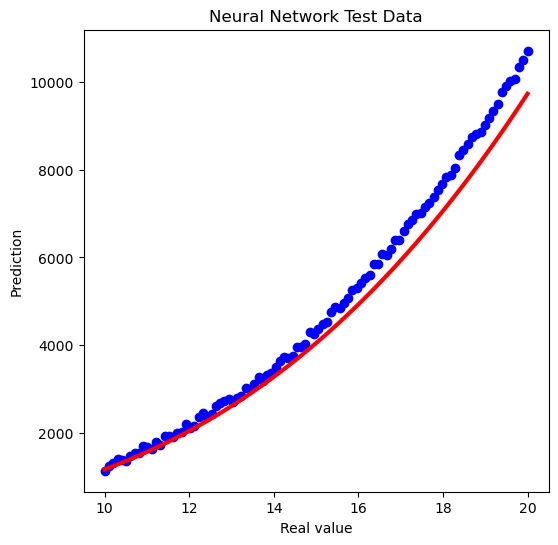

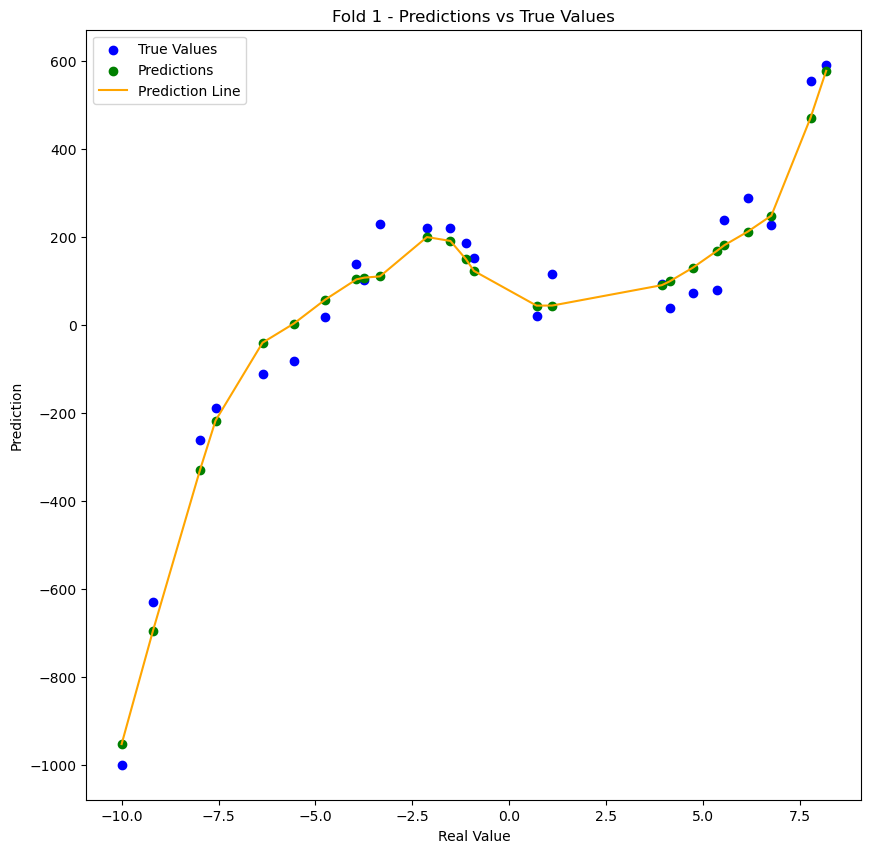

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

data_train = np.loadtxt("regression_train.txt")
data_test = np.loadtxt("regression_test.txt")

X_train = data_train[:,0].reshape(-1, 1) 
y_train = data_train[:,1] 

X_test = data_test[:,0].reshape(-1, 1)
y_test = data_test[:,1] 

poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(X_train)

poly2 = PolynomialFeatures(degree=3)
x_poly_test = poly2.fit_transform(X_test)

mlp_classifier = MLPRegressor(
                    hidden_layer_sizes=(100, 10),
                    activation='relu',
                    solver='lbfgs',
                    alpha=0,
                    learning_rate_init=0.01,
                    max_iter=500,
                    n_iter_no_change=25
                    )
mlp_classifier.fit(x_poly, y_train)

print("Score of train data: ", mlp_classifier.score(x_poly, y_train))
print("Score of test data: ", mlp_classifier.score(x_poly_test, y_test))

score = cross_val_score(mlp_classifier, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print("SE: ", -score)
print("Mean SEL: ", -score.mean())

fig, ax = plt.subplots(figsize=(6,6))
# ax.scatter(X_train, y_train, c='green')
ax.scatter(X_test, y_test, c='blue')
ax.plot(X_test, mlp_classifier.predict(x_poly_test), color='red', linewidth=3)
ax.set_xlabel('Real value')
ax.set_ylabel('Prediction')
ax.set_title("Neural Network Test Data")

# Assuming X_train and y_train are defined
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Initialize variables
fold = 0
mlp_classifier.fit(x_poly, y_train)  # Fit the classifier initially to avoid errors during split

for train_index, val_index in kf.split(X_train):
    fold += 1
    X_train_fold, X_val_fold = x_poly[train_index], x_poly[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Train the model on the training fold
    mlp_classifier.fit(X_train_fold, y_train_fold)

    # Predictions for the validation fold
    y_val_pred = mlp_classifier.predict(X_val_fold)

    X_plot_fold = X_train[val_index]
    
    # For the first fold, plot the data
     # Change this to select the fold you want to visualize
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(X_plot_fold, y_val_fold, c='blue', label='True Values')
    ax.scatter(X_plot_fold, y_val_pred, c='green', label='Predictions')
    ax.plot(X_plot_fold, y_val_pred, color='orange', label='Prediction Line')
    ax.set_xlabel('Real Value')
    ax.set_ylabel('Prediction')
    ax.legend()
    plt.title(f'Fold {fold} - Predictions vs True Values')
    plt.show()
    break  # Exit loop after plotting one fold